<a href="https://colab.research.google.com/github/Adityavenkatramani/Adityavenkatramani/blob/main/Image_caption_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A transformer is a deep learning model, using the recently discovered self-attention mechanism. The model processes all tokens, parsed by a byte pair encoding, simultaneously and subsequently calculates attention weights between them in successive layers.It transforms input sequences into output sequences


In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00


Import Dependencies

In [2]:
from transformers import VisionEncoderDecoderModel , ViTFeatureExtractor , AutoTokenizer
import torch
from PIL import Image

In [3]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.8.crossattention.bias', 'decoder.transformer.h.9.crossattention.bias', 'decoder.transformer.h.10.crossattention.bias', 'decoder.transformer.h.3.attn.masked_bias', 'decoder.transformer.h.1.crossattention.masked_bias', 'decoder.transformer.h.11.crossattention.bias', 'decoder.transformer.h.5.attn.masked_bias', 'decoder.transformer.h.11.attn.bias', 'decoder.transformer.h.8.attn.bias', 'decoder.transformer.h.1.attn.masked_bias', 'decoder.transformer.h.6.attn.masked_bias', 'decoder.transformer.h.2.attn.masked_bias', 'decoder.transformer.h.7.attn.bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.1.attn.bias', 'decoder.transformer.h.0.attn.masked_bias', 'decoder.transformer.h.11.attn.masked_bias', 'decoder.transformer.h.6.crossattention.bias', 'decoder.transformer.h.7.attn.masked_bias', 'decoder.transformer.h.0.crossatt

In [5]:
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Now we check if the model can be run on a gpu or it is run on a cpu

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [15]:
max_length = 16
num_beans = 4

gen_kwargs = {"max_length" : max_length , "num_beans" : num_beans}

In [22]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [23]:
predict_step(['/content/African-Man-Sitting-on-a-chair-drinking-coffee.jpg'])

['a man sitting on a chair in front of a laptop']

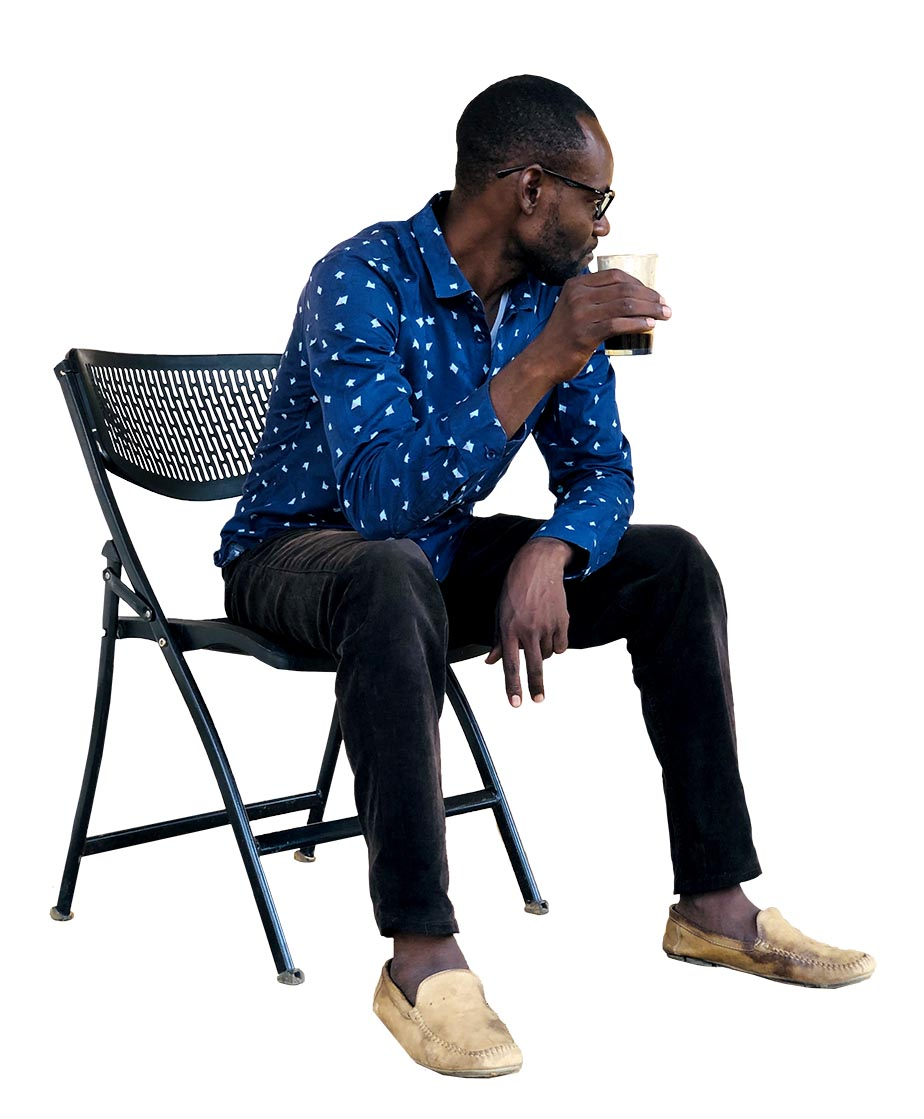

In [24]:
predict_step(['/content/image_captioning_2.jfif'])

['a person standing on top of a rock on top of a mountain']

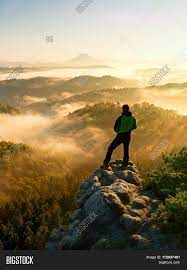

In [ ]:
#GG